# Twitter Sentiment Analysis - Data Exploration & Preprocessing

1. Loaded the Twitter sentiment analysis dataset
2. Performed exploratory data analysis to understand distribution of sentiments and entities
3. Implemented text preprocessing functions to clean and standardize the tweets
4. Applied preprocessing to all tweets in the dataset
5. Analyzed the most common tokens for each sentiment class
6. Saved the cleaned dataset for further feature engineering

**Dataset**: [Kaggle: Twitter Entity Sentiment Analysis](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)

## 1. Setup and Imports

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# NLP processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Emoji handling
import emoji

# Visualization settings
plt.style.use('ggplot')
sns.set(style='whitegrid')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Loading the Dataset

The dataset contains tweets labeled with sentiment (Positive, Negative, Neutral) and an entity/category (e.g., "Borderlands," "Halo," etc.).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
training_set_path = '/content/drive/MyDrive/Colab Notebooks/is5126/final-project/data/twitter_training.csv'

# Load dataset
try:
    df = pd.read_csv(training_set_path)
    print(f"Training set loaded with shape: {df.shape}")
    df = pd.read_csv(training_set_path)
    print(f"Training set loaded with shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please update the dataset path or upload the dataset file.")

Mounted at /content/drive
Dataset loaded with shape: (74681, 4)


## 3. Exploratory Data Analysis (EDA)

In [ ]:
header = ['id', 'entity', 'sentiment', 'content']
df.columns = header

# Display basic info about the dataset
print("\nDataset Info:")
df.info()

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB

First 5 rows of the dataset:


,id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


,0
id,0
entity,0
sentiment,0
content,686


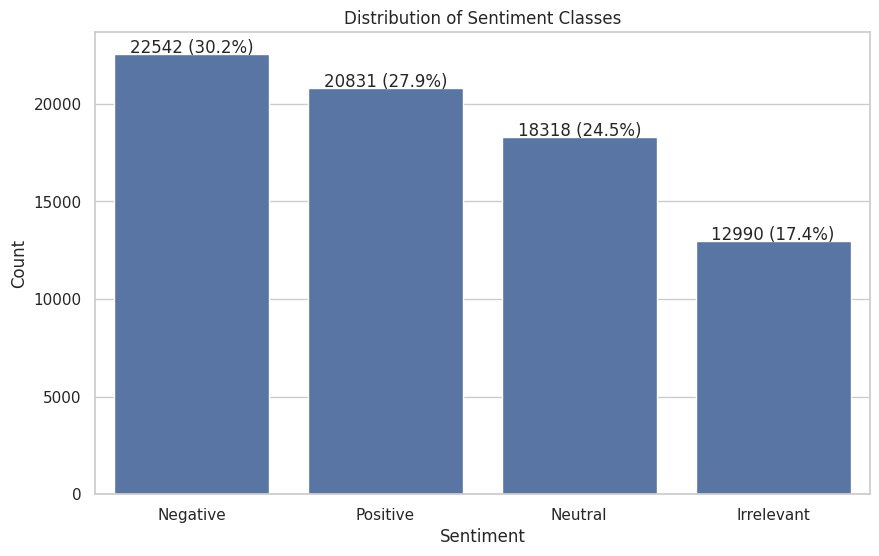

In [ ]:
# Distribution of sentiment classes
plt.figure(figsize=(10, 6))
sentiment_counts = df['sentiment'].value_counts()
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Add value labels on top of bars
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 50, f"{count} ({count/sentiment_counts.sum()*100:.1f}%)", ha='center')

plt.show()

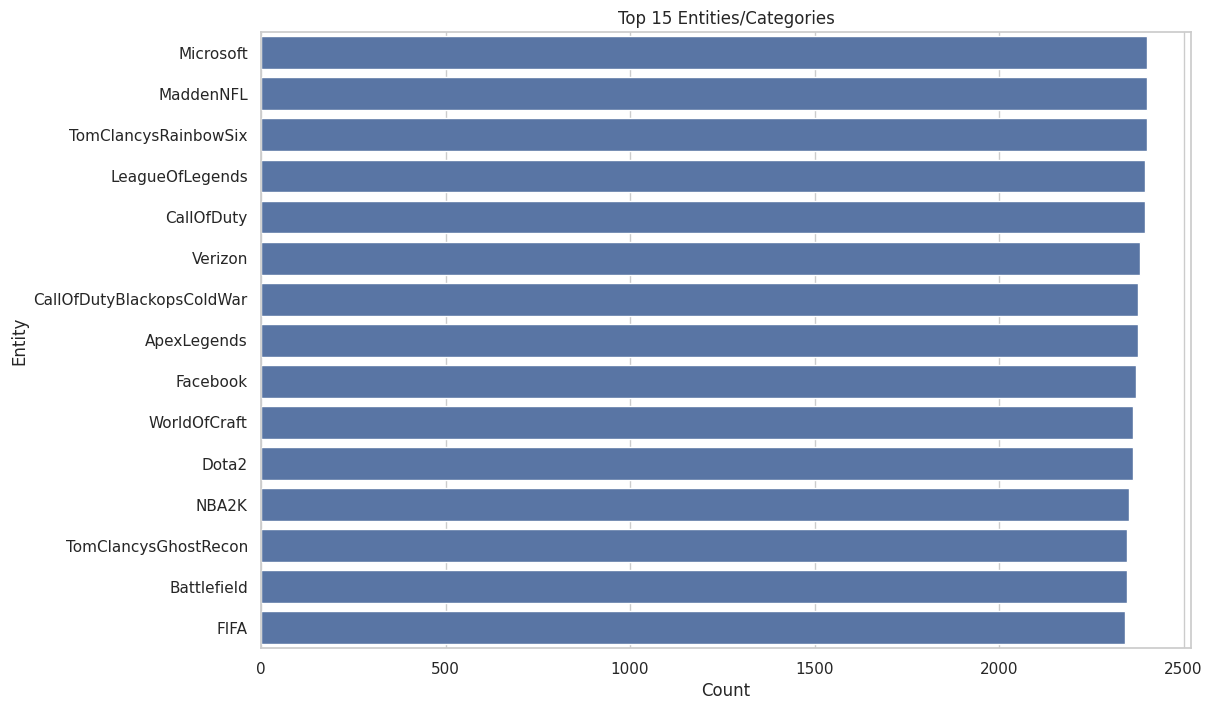

In [ ]:
# Distribution of entities/categories
plt.figure(figsize=(12, 8))
entity_counts = df['entity'].value_counts().head(15)  # Top 15 entities
sns.barplot(x=entity_counts.values, y=entity_counts.index)
plt.title('Top 15 Entities/Categories')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

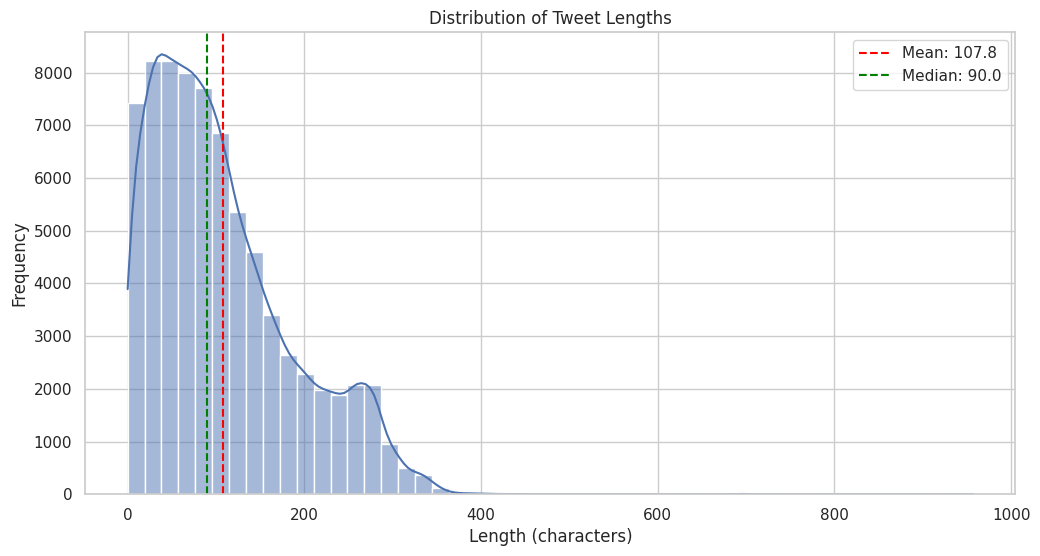

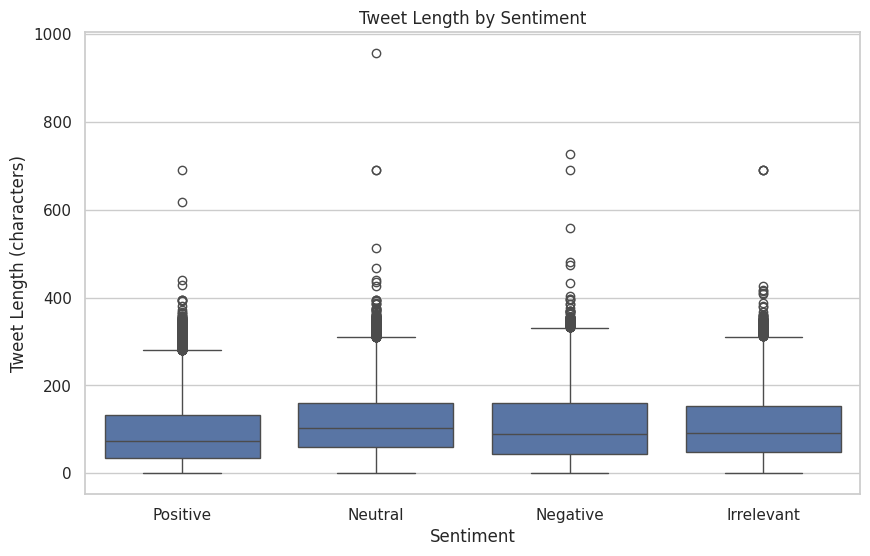

Tweets with 0 or 1 words: 3286 (4.40% of the dataset)


In [ ]:
# Analyze tweet length distribution
df['tweet_length'] = df['content'].apply(lambda x: len(x) if isinstance(x, str) else 0)

plt.figure(figsize=(12, 6))
sns.histplot(df['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.axvline(x=df['tweet_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["tweet_length"].mean():.1f}')
plt.axvline(x=df['tweet_length'].median(), color='green', linestyle='--', label=f'Median: {df["tweet_length"].median():.1f}')
plt.legend()
plt.show()

# Tweet length statistics by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=df)
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.show()

very_short_tweets = len(df[df['word_count'] <= 1])
total_tweets = len(df)
print(f"Tweets with 0 or 1 words: {very_short_tweets} ({very_short_tweets/total_tweets:.2%} of the dataset)")


In [ ]:
# Sample tweets from each sentiment class
print("\nSample Positive Tweet:")
print(df[df['sentiment'] == 'Positive']['content'].sample(1).values[0])

print("\nSample Negative Tweet:")
print(df[df['sentiment'] == 'Negative']['content'].sample(1).values[0])

print("\nSample Neutral Tweet:")
print(df[df['sentiment'] == 'Neutral']['content'].sample(1).values[0])


Sample Positive Tweet:
DB Nice job RhandlerR pic.twitter.com/sZUumDI571

Sample Negative Tweet:
I hate losing every round HERE pic.twitter.com / ZZgi8XvK7t

Sample Neutral Tweet:
Probably you wondering why yours truly hasn'not t posted many in a while, here's why. streamable. RFC com / rwkmp9 @Rainbow6Game @UbisoftSupport X I'm just very disappointed that still this entire great game that also has so much potential has not had years of problems with players cheaters.


## 4. Preprocessing Functions

In [ ]:
def extract_emojis(text):
    """Extract emojis from text and return them as a list of textual representations"""
    emoji_list = []
    for char in text:
        if char in emoji.distinct_emoji_list(text):
            emoji_name = emoji.demojize(char).replace(':', ' ').strip()
            emoji_list.append(emoji_name)
    return emoji_list

def clean_text(text, remove_emoji=False):
    """Clean the tweet text with options to handle emojis"""
    if pd.isna(text):
        return ""

    # Store emojis if needed
    emojis = []
    if not remove_emoji:
        emojis = extract_emojis(text)

    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Handle Twitter-specific markers
    # Preserve mentions and hashtags but standardize format
    text = re.sub(r'(@[\w]+)', r'user_mention', text)  # Replace @username with user_mention
    text = re.sub(r'(#[\w]+)', r'hashtag \1', text)    # Add 'hashtag' before #topic
    text = re.sub(r'rt\s+', '', text)                  # Remove RT labels

    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Add extracted emoji textual representations if any
    if emojis and not remove_emoji:
        text += " " + " ".join(emojis)

    return text

def tokenize_and_lemmatize(text, remove_stopwords=True):
    """Tokenize and lemmatize text, with option to remove stopwords"""
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords if requested
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return lemmatized_tokens

def preprocess_tweet(text, remove_stopwords=True, remove_emoji=False):
    """Complete preprocessing pipeline"""
    # Clean the text
    cleaned_text = clean_text(text, remove_emoji)

    # Tokenize and lemmatize
    tokens = tokenize_and_lemmatize(cleaned_text, remove_stopwords)

    # Join tokens back to text for certain models
    processed_text = ' '.join(tokens)

    return processed_text, tokens

## 5. Apply Preprocessing to the Dataset

In [ ]:
# Test preprocessing on a few examples
sample_tweets = df['content'].head(3).tolist()

for i, tweet in enumerate(sample_tweets):
    print(f"\nOriginal Tweet {i+1}:\n{tweet}")

    processed_text, tokens = preprocess_tweet(tweet)

    print(f"\nProcessed Tweet {i+1}:\n{processed_text}")
    print(f"\nTokens:\n{tokens}")


Original Tweet 1:
I am coming to the borders and I will kill you all,

Processed Tweet 1:
coming border kill

Tokens:
['coming', 'border', 'kill']

Original Tweet 2:
im getting on borderlands and i will kill you all,

Processed Tweet 2:
im getting borderland kill

Tokens:
['im', 'getting', 'borderland', 'kill']

Original Tweet 3:
im coming on borderlands and i will murder you all,

Processed Tweet 3:
im coming borderland murder

Tokens:
['im', 'coming', 'borderland', 'murder']


In [ ]:
# Apply preprocessing to the entire dataset
# This might take some time depending on the dataset size
print("Preprocessing tweets...")

# Create new columns for processed data
df['cleaned_content'] = ""
df['tokens'] = ""

# Process each tweet
for idx, row in df.iterrows():
    processed_text, tokens = preprocess_tweet(row['content'])
    df.at[idx, 'cleaned_content'] = processed_text
    df.at[idx, 'tokens'] = str(tokens)  # Convert list to string for storage

    # Print progress every 1000 rows
    if idx % 1000 == 0 and idx > 0:
        print(f"Processed {idx} tweets...")

print("Preprocessing complete!")

Preprocessing tweets...
Processed 1000 tweets...
Processed 2000 tweets...
Processed 3000 tweets...
Processed 4000 tweets...
Processed 5000 tweets...
Processed 6000 tweets...
Processed 8000 tweets...
Processed 9000 tweets...
Processed 10000 tweets...
Processed 11000 tweets...
Processed 12000 tweets...
Processed 13000 tweets...
Processed 14000 tweets...
Processed 15000 tweets...
Processed 16000 tweets...
Processed 17000 tweets...
Processed 19000 tweets...
Processed 20000 tweets...
Processed 21000 tweets...
Processed 23000 tweets...
Processed 24000 tweets...
Processed 25000 tweets...
Processed 26000 tweets...
Processed 27000 tweets...
Processed 28000 tweets...
Processed 29000 tweets...
Processed 30000 tweets...
Processed 31000 tweets...
Processed 32000 tweets...
Processed 33000 tweets...
Processed 34000 tweets...
Processed 35000 tweets...
Processed 36000 tweets...
Processed 37000 tweets...
Processed 39000 tweets...
Processed 40000 tweets...
Processed 41000 tweets...
Processed 42000 tweets

We observed that some tweets are extremely short (0 or 1 words) after preprocessing. These provide very little meaningful information for sentiment analysis.

In [ ]:
# Count  problematic records
total_problematic = len(df[(df['cleaned_content'].isna()) | (df['cleaned_content'].fillna('') == '')])
print(f"Total records with missing or empty content: {total_problematic} ({total_problematic/len(df):.2%} of the dataset)")

# Show examples of these problematic records
print("\nExamples of records with missing/empty processed content:")
print(df[(df['cleaned_content'].isna()) | (df['cleaned_content'].fillna('') == '')][['content', 'cleaned_content', 'sentiment']].head())

# Remove these records
df_clean = df[~(df['cleaned_content'].isna()) & (df['cleaned_content'].fillna('') != '')].copy()

# Print removal stats
removed_nan_count = len(df) - len(df_clean)
print(f"\nRemoved {removed_nan_count} records with NaN or empty processed content ({removed_nan_count/len(df):.2%} of the dataset)")

# Update our main dataframe
df = df_clean
print(f"Updated dataset size: {len(df)} tweets")

Total records with missing or empty content: 140 (0.20% of the dataset)

Examples of records with missing/empty processed content:
      content cleaned_content sentiment
59    . . [                     Neutral
61       .. [                   Neutral
63       .. [                   Neutral
64    .. what                   Neutral
556   you out                   Neutral

Removed 140 records with NaN or empty processed content (0.20% of the dataset)
Updated dataset size: 71255 tweets


## 6. Post-Processing Analysis

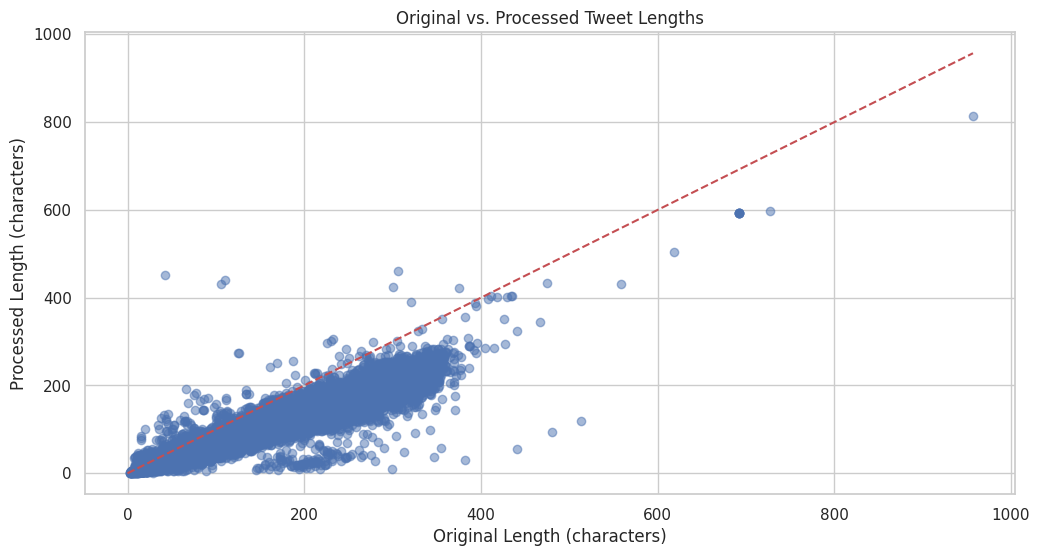

Average reduction in tweet length: 36.34 characters (32.25%)


In [ ]:
# Compare original and processed tweet lengths
df['processed_length'] = df['cleaned_content'].apply(len)

plt.figure(figsize=(12, 6))
plt.scatter(df['tweet_length'], df['processed_length'], alpha=0.5)
plt.plot([0, df['tweet_length'].max()], [0, df['tweet_length'].max()], 'r--')  # Diagonal line
plt.title('Original vs. Processed Tweet Lengths')
plt.xlabel('Original Length (characters)')
plt.ylabel('Processed Length (characters)')
plt.show()

# Average reduction in length
reduction = (df['tweet_length'] - df['processed_length']).mean()
percent_reduction = (reduction / df['tweet_length'].mean()) * 100
print(f"Average reduction in tweet length: {reduction:.2f} characters ({percent_reduction:.2f}%)")

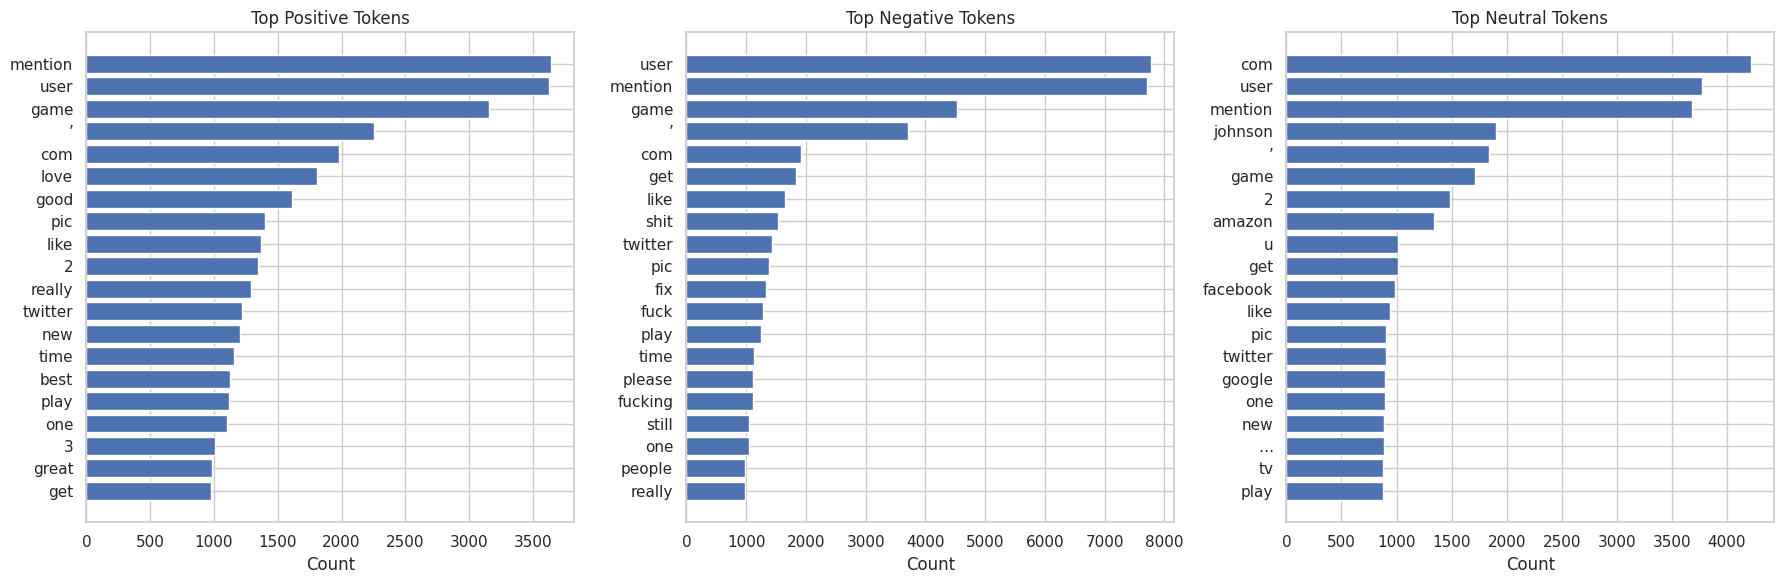

In [ ]:
# Most common tokens by sentiment
def get_top_tokens(sentiment_class, n=20):
    # Filter by sentiment
    filtered_df = df[df['sentiment'] == sentiment_class]

    # Combine all tokens from this sentiment
    all_tokens = []
    for token_str in filtered_df['tokens']:
        # Convert the string representation of list back to a list
        tokens = eval(token_str)
        all_tokens.extend(tokens)

    # Count and return top tokens
    return Counter(all_tokens).most_common(n)

# Get top tokens for each sentiment
positive_tokens = get_top_tokens('Positive')
negative_tokens = get_top_tokens('Negative')
neutral_tokens = get_top_tokens('Neutral')

# Plot top tokens for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Positive
pos_tokens, pos_counts = zip(*positive_tokens)
axes[0].barh(range(len(pos_tokens)), pos_counts, align='center')
axes[0].set_yticks(range(len(pos_tokens)))
axes[0].set_yticklabels(pos_tokens)
axes[0].invert_yaxis()  # Display top tokens at the top
axes[0].set_title('Top Positive Tokens')
axes[0].set_xlabel('Count')

# Negative
neg_tokens, neg_counts = zip(*negative_tokens)
axes[1].barh(range(len(neg_tokens)), neg_counts, align='center')
axes[1].set_yticks(range(len(neg_tokens)))
axes[1].set_yticklabels(neg_tokens)
axes[1].invert_yaxis()
axes[1].set_title('Top Negative Tokens')
axes[1].set_xlabel('Count')

# Neutral
neu_tokens, neu_counts = zip(*neutral_tokens)
axes[2].barh(range(len(neu_tokens)), neu_counts, align='center')
axes[2].set_yticks(range(len(neu_tokens)))
axes[2].set_yticklabels(neu_tokens)
axes[2].invert_yaxis()
axes[2].set_title('Top Neutral Tokens')
axes[2].set_xlabel('Count')

plt.tight_layout()
plt.show()

## 7. Train/Validation/Test Splitting

Before saving the processed dataset, we'll split it into train, validation, and test sets to prevent data leakage during feature engineering and model training. This ensures that:
1. Features are engineered only on the training set
2. Model parameters are optimized on the validation set
3. Final evaluation is conducted on the unseen test set

We'll also address class imbalance specifically in the training set.

In [ ]:
# Import necessary libraries for splitting
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into train, validation, and test sets (70%, 15%, 15%)
def split_data(df, test_size=0.15, val_size=0.15, random_state=42, stratify_col='sentiment'):
    print(f"Original dataset shape: {df.shape}")

    # First split: training + validation vs test
    train_val_df, test_df = train_test_split(
        df,
        test_size=test_size,
        random_state=random_state,
        stratify=df[stratify_col] if stratify_col else None
    )

    # Second split: training vs validation
    # Adjust validation size to be a percentage of the training + validation set
    val_ratio = val_size / (1 - test_size)
    train_df, val_df = train_test_split(
        train_val_df,
        test_size=val_ratio,
        random_state=random_state,
        stratify=train_val_df[stratify_col] if stratify_col else None
    )

    print(f"Train set: {train_df.shape[0]} samples ({train_df.shape[0]/df.shape[0]:.2%})")
    print(f"Validation set: {val_df.shape[0]} samples ({val_df.shape[0]/df.shape[0]:.2%})")
    print(f"Test set: {test_df.shape[0]} samples ({test_df.shape[0]/df.shape[0]:.2%})")

    return train_df, val_df, test_df

# Split the dataset
train_df, val_df, test_df = split_data(df, stratify_col='sentiment')

# Check class distribution in each split
print("\nClass distribution in training set:")
print(train_df['sentiment'].value_counts())
print("\nClass distribution in validation set:")
print(val_df['sentiment'].value_counts())
print("\nClass distribution in test set:")
print(test_df['sentiment'].value_counts())

### 7.1 Address Class Imbalance in Training Set

Now we'll handle class imbalance in the training set using the technique we explored earlier. We'll apply SMOTE for the minority classes, while keeping the validation and test sets with their original distribution to reflect real-world performance.

In [ ]:
# Handle class imbalance in the training set only
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Apply SMOTE to balance the training set
def balance_training_set(train_df, strategy='hybrid'):
    # Prepare text features for SMOTE
    # We need numeric features for SMOTE to work
    X = train_df[['processed_content', 'entity']].copy()
    y = train_df['sentiment'].copy()

    # Convert text to numeric features for SMOTE
    vectorizer = CountVectorizer(max_features=1000)  # Limit features to avoid memory issues
    X_text = vectorizer.fit_transform(X['processed_content'])

    # Apply resampling strategy
    if strategy == 'oversample':
        print("Applying SMOTE oversampling to training set...")
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_text, y)
    elif strategy == 'undersample':
        print("Applying random undersampling to training set...")
        rus = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = rus.fit_resample(X_text, y)
    else:  # hybrid approach
        print("Applying hybrid sampling to training set (SMOTE + undersampling)...")
        # First oversample minority classes to an intermediate level
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        # Then undersample majority classes to achieve balance
        rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

        # Create a pipeline with both samplers
        pipeline = Pipeline([
            ('smote', smote),
            ('rus', rus)
        ])

        X_resampled, y_resampled = pipeline.fit_resample(X_text, y)

    # Display class distribution after balancing
    print("\nClass distribution after balancing:")
    resampled_counts = Counter(y_resampled)
    for label, count in sorted(resampled_counts.items()):
        print(f"{label}: {count}")

    # The indices of the resampled data correspond to the original data for non-synthetic samples
    # For synthetic samples, we need a way to map them back to usable data
    # For simplicity, we'll store the resampled class distribution for feature engineering

    print(f"\nOriginal training set size: {len(train_df)}")
    print(f"Balanced training set size: {len(y_resampled)}")

    # We'll store the indices and sampling weights for feature engineering
    return resampled_counts

# Apply balancing to training set
resampled_counts = balance_training_set(train_df, strategy='hybrid')

# Note: We'll save the original training, validation, and test splits
# During model training, we'll apply the same resampling technique to balance the training data

### 7.2 Save Split Datasets

Next, we'll save the train, validation, and test splits separately to ensure proper use during feature engineering and model training.

In [ ]:
# Save the train, validation, and test splits
data_dir = '../data'
os.makedirs(data_dir, exist_ok=True)

# Save each split
train_path = os.path.join(data_dir, 'train.csv')
val_path = os.path.join(data_dir, 'validation.csv')
test_path = os.path.join(data_dir, 'test.csv')

train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"Training set saved to {train_path}")
print(f"Validation set saved to {val_path}")
print(f"Test set saved to {test_path}")

# Save the resampling information for reproducibility
import pickle
resampling_info = {
    'strategy': 'hybrid',
    'class_distribution': dict(resampled_counts)
}

with open(os.path.join(data_dir, 'resampling_info.pkl'), 'wb') as f:
    pickle.dump(resampling_info, f)

print(f"Resampling information saved to {os.path.join(data_dir, 'resampling_info.pkl')}")

## 8. Save Cleaned Dataset for Feature Engineering

In [ ]:
# Select columns to save
cleaned_df = df[['content', 'cleaned_content', 'tokens', 'entity', 'sentiment']]

# Save to CSV for the next stage
cleaned_csv_path = '/content/drive/MyDrive/Colab Notebooks/is5126/final-project/data/twitter_training_clean.csv'
cleaned_df.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned dataset saved to {cleaned_csv_path}")

Cleaned dataset saved to /content/drive/MyDrive/Colab Notebooks/is5126/final-project/data/twitter_training_clean.csv
